<a href="https://colab.research.google.com/github/Yadukrishnan1/Fraud-Detection/blob/main/amir_lobster_boat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading packages

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A random number distribution for next 5 years with the possible price per pound for lobster from restaurants.

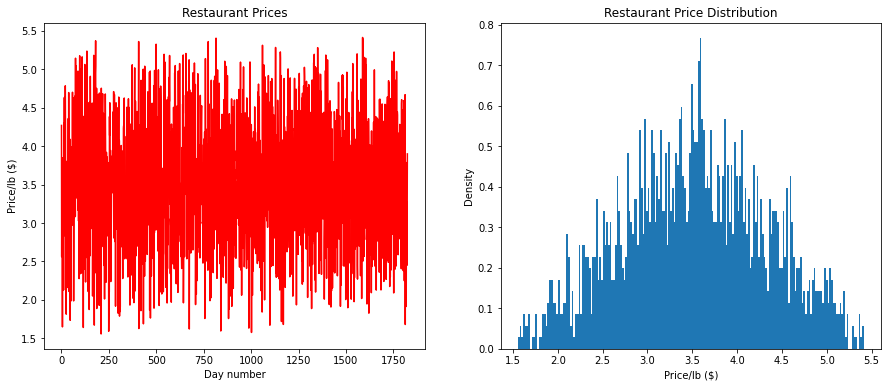

In [136]:
ppp_rest=np.random.triangular(1.5, 3.5, 5.5, size=1825)

# Visualization

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(ppp_rest, 'r')
plt.hlines(ppp_rest.mean(), xmin=0, xmax=100)
plt.title('Restaurant Prices')
plt.xlabel('Day number')
plt.ylabel('Price/lb ($)')

plt.subplot(122)
h1 = plt.hist(ppp_rest, bins=200,density=True)
plt.title('Restaurant Price Distribution')
plt.ylabel('Density')
plt.xlabel('Price/lb ($)')
plt.show()

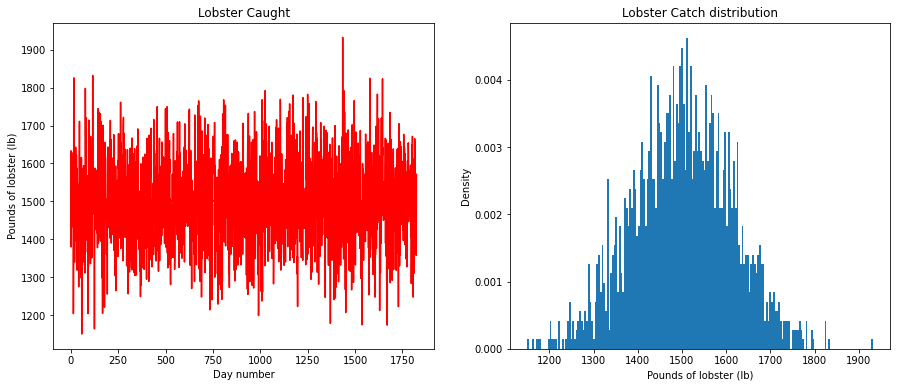

In [138]:
lobst_quant=np.random.normal(loc=1500, scale=np.sqrt(12500), size=1825)

# Visualization

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(lobst_quant, 'r')
plt.hlines(lobst_quant.mean(), xmin=0, xmax=1825)
plt.title('Lobster Caught')
plt.xlabel('Day number')
plt.ylabel('Pounds of lobster (lb)')

plt.subplot(122)
h2 = plt.hist(lobst_quant, bins=200,
             density=True)
plt.title('Lobster Catch distribution')
plt.ylabel('Density')
plt.xlabel('Pounds of lobster (lb)')
plt.show()

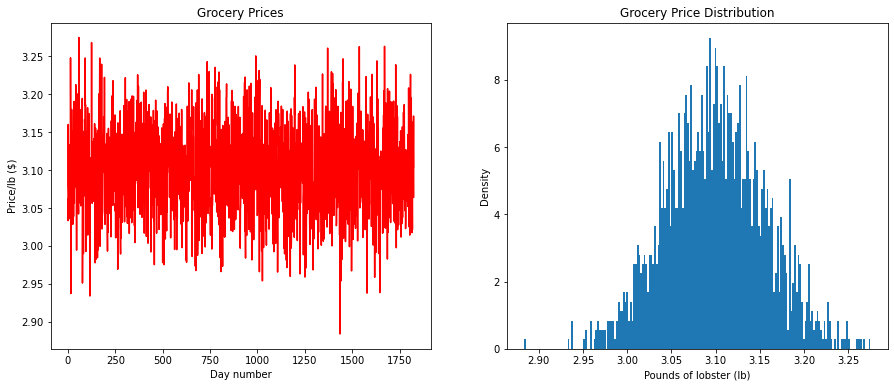

In [141]:
def ppp_groc(y):
  return 3.85-0.0005*y
ppp_groc(lobst_quant)

# Visualization

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(ppp_groc(lobst_quant), 'r')
plt.title('Grocery Prices')
plt.xlabel('Day number')
plt.ylabel('Price/lb ($)')

plt.subplot(122)
h2 = plt.hist(ppp_groc(lobst_quant), bins=200,density=True)
plt.title('Grocery Price Distribution')
plt.ylabel('Density')
plt.xlabel('Pounds of lobster (lb)')
plt.show()

## The profit function(revenue-operating income) to be maximized for X
X=fraction (percentage/100)

In [147]:
def profit(x, ppp_rest=ppp_rest, lobst_quant=lobst_quant):
  return (ppp_rest*(x*lobst_quant) + ppp_groc(lobst_quant*(1-x))*((1-x)*lobst_quant) - 2250.0).sum()

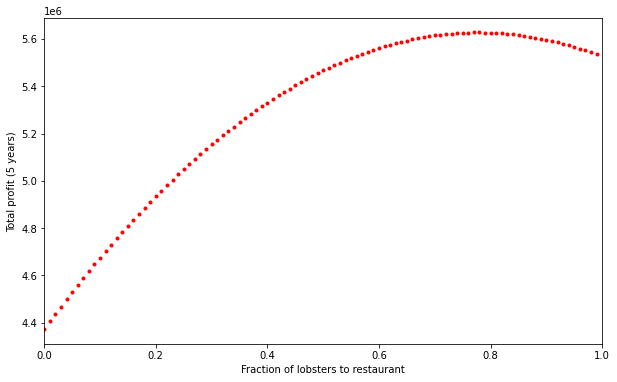

In [148]:
plt.figure(figsize=(10,6))

x=np.arange(0,1.0,0.01)
profit_x=[profit(xx) for xx in x]
plt.plot(x, profit_x, 'r.')
plt.xlim(0,1)
plt.xlabel('Fraction of lobsters to restaurant')
plt.ylabel('Total profit (5 years)')
plt.show()

In [149]:
from scipy.optimize import minimize_scalar

def inv_profit(x, ppp_rest=ppp_rest, lobst_quant=lobst_quant):
  return -(ppp_rest*(x*lobst_quant) + ppp_groc(lobst_quant*(1-x))*((1-x)*lobst_quant) - 2250.0).sum()
res = minimize_scalar(inv_profit)
res.x

0.7784973234963366


# **Optimal Percentage = 77%**



